In [17]:
!pip install pycountry-convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 56.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 14.6 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=63dd64432d3ed90c8d9028fa68cddf5b89bc84a4fcf3a429ea28a28cb8f7ba73
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [18]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pycountry_convert as pc

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Info

Importing & showcasing the data

In [20]:
df = pd.read_csv('/global_data_on_sustainable_energy.csv')
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


In [23]:
#rename CO2
df.rename(columns={"Value_co2_emissions_kt_by_country":"CO2" , 'Land Area(Km2)':'Land'} , inplace=True)
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [24]:
#Data cleaning
df.dropna(subset=['Entity', 'Year'], inplace=True)  # Remove rows with missing 'Entity' or 'Year'
df.fillna(0, inplace=True)  # Fill other missing values with 0, you can adapt this based on the context
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,0.0,0.000000,0.000000,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,0.0,0.000000,0.000000,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,0.0,0.000000,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,0.0,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,0.0,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,0.0,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,0.0,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,0.0,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,0.0,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,0.0,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


## CO2 Emission

Visualising CO2 emissions in respective countries. This part wil help us identify the significance of renewable energy.

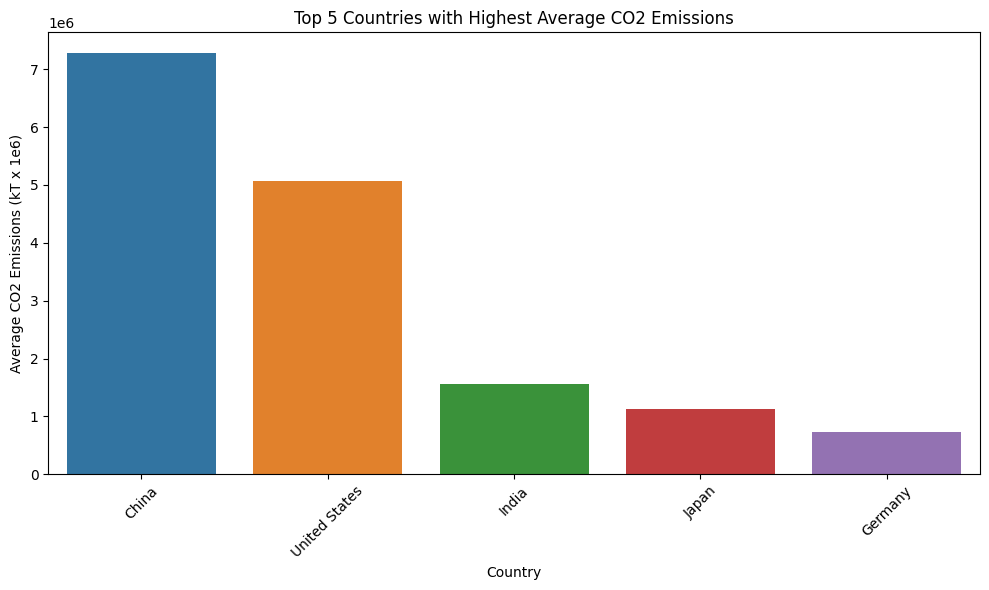

In [25]:
# Top 5 countries with highest CO2 emission
average_co2_emission_by_country = df.groupby('Entity')['CO2'].mean()
top_5_countries = average_co2_emission_by_country.nlargest(5)

plt.figure(figsize = (10, 6))
sns.barplot(x = top_5_countries.index, y = top_5_countries.values)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (kT x 1e6)')
plt.title('Top 5 Countries with Highest Average CO2 Emissions')

plt.xticks(rotation = 45, ha = 'center')

plt.tight_layout()
plt.show()

There will be more Analysis
1. 5 countries with the lowest carbon emissions
2. A Heatmap

    ......

I think I will firstly do a classification here, maybe by CNN. Then I can further research on the differences among regions.

In [26]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df['Continent'] = df['Entity'].apply(country_to_continent)
df.head(10)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land,Latitude,Longitude,Continent
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,1.64,760.000000,0.0,0.000000,0.000000,60,652230.0,33.93911,67.709953,Asia
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,1.74,730.000000,0.0,0.000000,0.000000,60,652230.0,33.93911,67.709953,Asia
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,1.40,1029.999971,0.0,0.000000,179.426579,60,652230.0,33.93911,67.709953,Asia
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,1.40,1220.000029,0.0,8.832278,190.683814,60,652230.0,33.93911,67.709953,Asia
4,Afghanistan,2004,20.064968,10.90,7.75,0.0,44.24,0.33,0.0,0.56,...,1.20,1029.999971,0.0,1.414118,211.382074,60,652230.0,33.93911,67.709953,Asia
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,1.41,1549.999952,0.0,11.229715,242.031313,60,652230.0,33.93911,67.709953,Asia
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,1.50,1759.999990,0.0,5.357403,263.733602,60,652230.0,33.93911,67.709953,Asia
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,1.53,1769.999981,0.0,13.826320,359.693158,60,652230.0,33.93911,67.709953,Asia
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,1.94,3559.999943,0.0,3.924984,364.663542,60,652230.0,33.93911,67.709953,Asia
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,2.25,4880.000114,0.0,21.390528,437.268740,60,652230.0,33.93911,67.709953,Asia


In [27]:
# Creating an empty table df_energy_all with the necessary columns and data types
columns = ['Year', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
df_energy_all = pd.DataFrame(columns=columns)

# Creating a function to automatically calculate the average value for the continent for the year
def filter_and_calculate_mean(df, year, column_name):
    row_data = {'Year': year}
    for continent in columns[1:]:
        filtered_df = df[(df['Year'] == year) & (df['Continent'] == continent)]
        mean_value = filtered_df[column_name].mean()
        row_data[continent] = mean_value
    return row_data

column_name = 'Primary energy consumption per capita (kWh/person)'
data_to_concat = []

for year in range(2000, 2021):
    row_data = filter_and_calculate_mean(df, year, column_name)
    data_to_concat.append(row_data)

# Putting it all together
df_energy_all = pd.concat([df_energy_all, pd.DataFrame(data_to_concat)], ignore_index=True)

df_energy_all['Year'] = df_energy_all['Year'].astype('int64')

# Displaying the df_energy_all table for review
display(df_energy_all)

,Year,Asia,Europe,Africa,North America,South America,Oceania
0,2000,32603.548770,44338.700471,4847.900957,27566.726344,13934.571591,20410.083500
1,2001,32578.960987,45077.597029,4927.979202,27755.850681,13594.028840,19753.279083
2,2002,33162.266291,45139.789114,5469.067622,28417.839719,13549.300650,19865.650267
3,2003,34514.456805,45684.361743,5504.370569,28567.084826,13544.852940,19749.410967
4,2004,36230.592382,46671.465343,5273.563727,29296.645961,13972.343900,19765.507192
5,2005,37451.074974,46636.735829,5585.993981,29737.698887,14138.375900,19710.961400
6,2006,36457.840863,46652.192029,5678.845593,30871.057922,14445.831080,19167.817408
7,2007,35493.393719,45862.498946,5522.412833,32065.740419,14902.684930,19324.754717
8,2008,35432.366691,46592.391405,5678.256258,31494.962770,15461.434940,19097.807625
9,2009,34366.110954,44063.963243,5791.133308,29676.628769,15278.057450,18727.961067


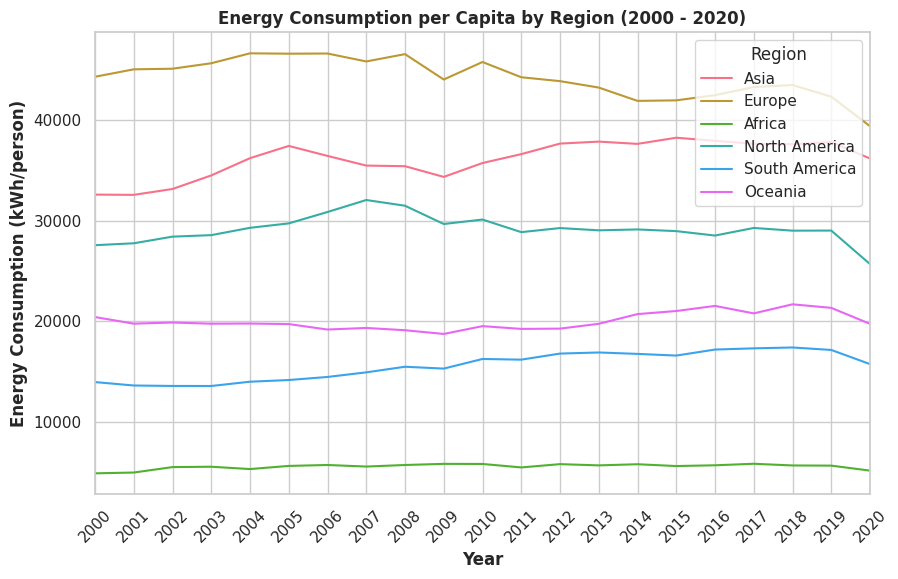

In [28]:
df_energy_cons_melted = pd.melt(df_energy_all, id_vars='Year', var_name='Region', value_name='Energy Consumption')

# Building a graph
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
palette = sns.color_palette("husl", len(df_energy_cons_melted['Region'].unique()))

plot = sns.lineplot(data=df_energy_cons_melted, x='Year', y='Energy Consumption', hue='Region', palette=palette)

# Adding names to the graph
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Energy Consumption (kWh/person)', fontweight='bold')
plt.title('Energy Consumption per Capita by Region (2000 - 2020)', fontweight='bold')
plt.legend(title='Region')
plt.margins(x=0)

# Adjust the placement of captions on the x-axis and change the date format
years = range(2000, 2021)
plot.set_xticks(years)
plot.set_xticklabels([str(year) for year in years], rotation=45)

plt.show()

After classification, I will study on the correlations among variables.

## Scatterplot

Text(0, 0.5, 'Renewable Share (%)')

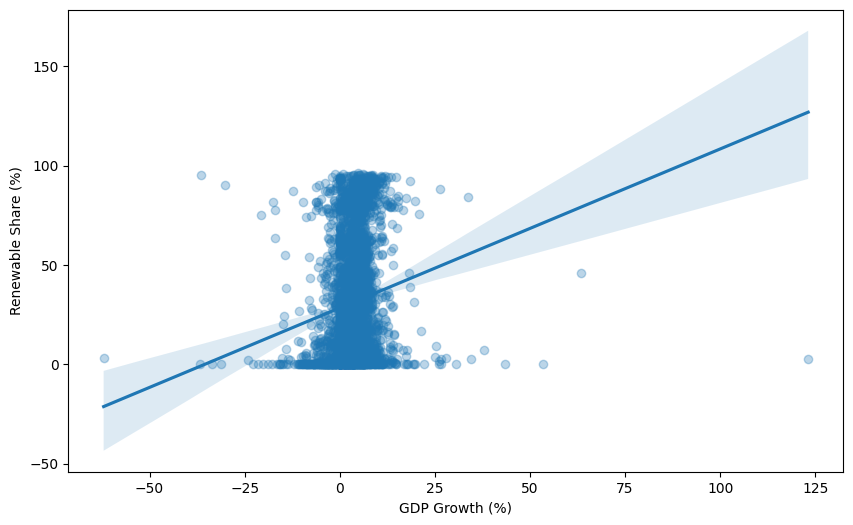

In [ ]:
# Renewable Share vs GDP Growth
plt.figure(figsize=(10,6))
sns.regplot(x='gdp_growth', y='Renewable energy share in the total final energy consumption (%)', data=df, scatter_kws={'alpha':0.3})
plt.title('', size=15)
plt.xlabel('GDP Growth (%)')
plt.ylabel('Renewable Share (%)')

Text(0, 0.5, 'Primary energy consumption/capita (kWh/person)')

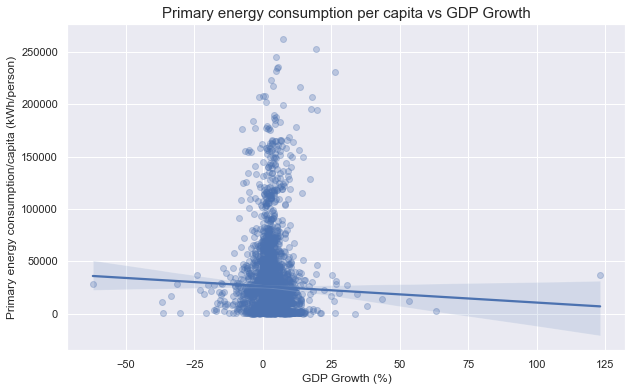

In [ ]:
# Primary energy consumption per capita vs GDP Growth
plt.figure(figsize=(10,6))
sns.regplot(x='gdp_growth', y='Primary energy consumption per capita (kWh/person)', data=df, scatter_kws={'alpha':0.3})
plt.title('Primary energy consumption per capita vs GDP Growth', size=15)
plt.xlabel('GDP Growth (%)')
plt.ylabel('Primary energy consumption/capita (kWh/person)')


Text(0, 0.5, 'Electricity Access (% Population)')

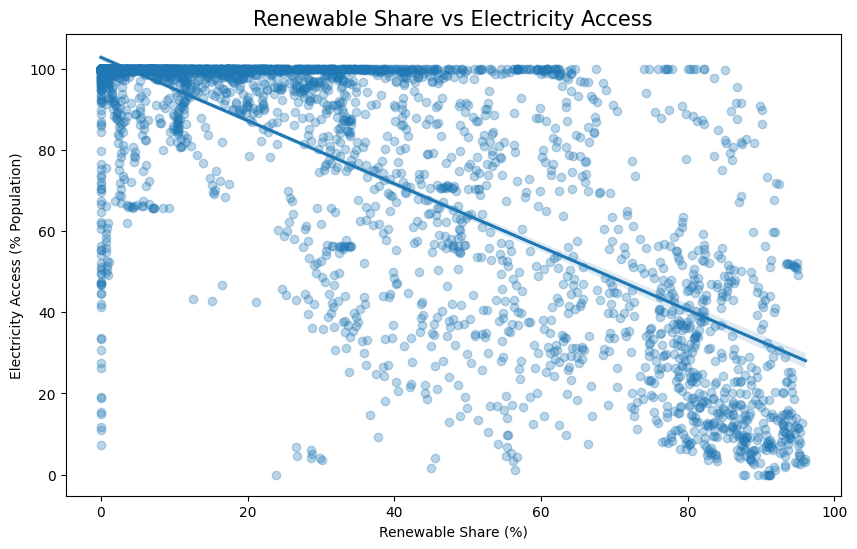

In [ ]:
# Renewable Share vs Electricity Access
plt.figure(figsize=(10,6))
sns.regplot(x='Renewable energy share in the total final energy consumption (%)', y='Access to electricity (% of population)', data=df, scatter_kws={'alpha':0.3})
plt.title('Renewable Share vs Electricity Access', size=15)
plt.xlabel('Renewable Share (%)')
plt.ylabel('Electricity Access (% Population)')

Text(0, 0.5, 'Primary energy consumption/capita (kWh/person)')

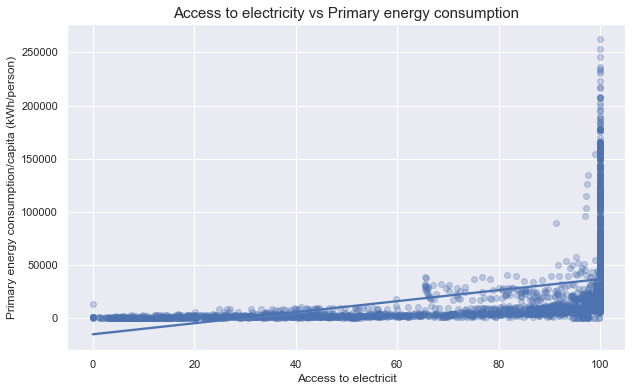

In [ ]:
# Access to electricity vs Primary energy consumption
plt.figure(figsize=(10,6))
sns.regplot(x='Access to electricity (% of population)', y='Primary energy consumption per capita (kWh/person)', data=df, scatter_kws={'alpha':0.3})
plt.title('Access to electricity vs Primary energy consumption', size=15)
plt.xlabel('Access to electricit')
plt.ylabel('Primary energy consumption/capita (kWh/person)')

Part of the data analysis to find corelations among indicator and potential Y variables: Primary energy consumption;Renewablr Energy Share